In [1]:
!pwd

!ls -ltr

/content
total 4
drwxr-xr-x 1 root root 4096 Jul  3 16:14 sample_data


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

!ls

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
gdrive	sample_data


In [3]:
!ls -ltr '/content/gdrive/My Drive/Colab Notebooks/'

!cp 'gdrive/My Drive/Colab Notebooks/balance_data_12K.zip' balance_data_12K.zip

!ls -ltr

total 5460426
-rw------- 1 root root 1363749270 Jul  9 21:11 dataset.zip
-rw------- 1 root root      42878 Jul  9 21:35 keras_retina.ipynb
-rw------- 1 root root 2585597451 Jul 10 13:05 full_data.zip
-rw------- 1 root root 1642031078 Jul 16 19:04 balance_data_12K.zip
-rw------- 1 root root       7753 Jul 19 07:15 CNN_sz100_c32-64_dense-32_augment_epochs-100.pickle
-rw------- 1 root root      46043 Jul 19 10:39 keras_retina2.ipynb
total 1603560
drwxr-xr-x 1 root root       4096 Jul  3 16:14 sample_data
drwx------ 3 root root       4096 Jul 19 10:38 gdrive
-rw------- 1 root root 1642031078 Jul 19 10:40 balance_data_12K.zip


In [0]:
!ls -ltr

!unzip balance_data_12K.zip
#!unzip full_data.zip
#!ls -ltr full_data/train/

In [12]:
#CNN
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras import optimizers

#Initialize the CNN
classifier = Sequential()

szx=100
szy=100
batch_size_train = 32
batch_size_test = 8
N_EPOCHS = 40

classifier.add(Conv2D(32,(3,3),input_shape=(szx,szy,3),activation='relu',padding='same'))
classifier.add(Conv2D(64,(3,3),input_shape=(szx,szy,3),activation='relu',padding='same'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.25))

classifier.add(Flatten())

classifier.add(Dense(32, activation = 'relu'))
classifier.add(Dropout(0.7))
classifier.add(Dense(1, activation = 'sigmoid'))


adam = optimizers.Adam(lr=0.001)
classifier.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.summary()



W0719 12:41:01.213327 139958440249216 nn_ops.py:4224] Large dropout rate: 0.7 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 100, 100, 32)      896       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 50, 50, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 160000)            0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                5120032   
_________________________________________________________________
dropout_8 (Dropout)          (None, 32)                0         
__________

In [13]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

#train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=10,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
#train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=10,shear_range=0.01)
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

path2train = r'balance_data_12K/train/'
path2test = r'balance_data_12K/test/'

training_set = train_datagen.flow_from_directory(path2train,target_size=(szx,szy),batch_size=batch_size_train,
                                                 class_mode='binary')

test_set = test_datagen.flow_from_directory(path2test,target_size=(szx,szy),batch_size=batch_size_test,
                                            class_mode='binary',shuffle='False')

print('\ntrain size = ',training_set.n)
print('test  size = ',test_set.n)

STEP_SIZE_TRAIN = int(np.ceil(training_set.n/batch_size_train))
STEP_SIZE_VALID = int(np.ceil(test_set.n/batch_size_test))

print('\nSTEPS = ',STEP_SIZE_TRAIN,STEP_SIZE_VALID)


Found 17987 images belonging to 2 classes.
Found 5532 images belonging to 2 classes.

train size =  17987
test  size =  5532

STEPS =  563 692


In [14]:
import time
from datetime import timedelta
import pickle


start = time.time()

history = classifier.fit_generator(training_set,steps_per_epoch=STEP_SIZE_TRAIN,epochs=N_EPOCHS,
                                   validation_data=test_set,validation_steps=STEP_SIZE_VALID)

elapsed = (time.time() - start)

print('\ntime elapsed = ',str(timedelta(seconds=elapsed)))

with open('CNN_sz100_c32-64_dense-32_dropout_p7_epoch-40.pickle', 'wb') as handle:
 pickle.dump(history.history, handle, protocol=pickle.HIGHEST_PROTOCOL)

#!ls
#learning rate


!cp CNN_sz100_c32-64_dense-32_dropout_p7_epoch-40.pickle 'gdrive/My Drive/Colab Notebooks/' 


Epoch 1/40
563/563 [==============================] - 73s 129ms/step - loss: 0.6782 - acc: 0.5715 - val_loss: 0.5520 - val_acc: 0.7332
Epoch 2/40
563/563 [==============================] - 72s 128ms/step - loss: 0.5474 - acc: 0.7054 - val_loss: 0.4607 - val_acc: 0.7925
Epoch 3/40
563/563 [==============================] - 71s 127ms/step - loss: 0.4834 - acc: 0.7526 - val_loss: 0.4125 - val_acc: 0.8107
Epoch 4/40
563/563 [==============================] - 71s 127ms/step - loss: 0.4462 - acc: 0.7861 - val_loss: 0.3859 - val_acc: 0.8281
Epoch 5/40
563/563 [==============================] - 72s 129ms/step - loss: 0.4131 - acc: 0.8029 - val_loss: 0.3640 - val_acc: 0.8451
Epoch 6/40
563/563 [==============================] - 73s 130ms/step - loss: 0.3842 - acc: 0.8212 - val_loss: 0.3499 - val_acc: 0.8514
Epoch 7/40
563/563 [==============================] - 72s 128ms/step - loss: 0.3537 - acc: 0.8342 - val_loss: 0.3352 - val_acc: 0.8586
Epoch 8/40
563/563 [==============================] - 7

In [0]:
#!cp CNN_sz100_c32-64_dense-32_dropout_p2.pickle 'gdrive/My Drive/Colab Notebooks/'

#print(type(history.history))




Learning rate =  0.001
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


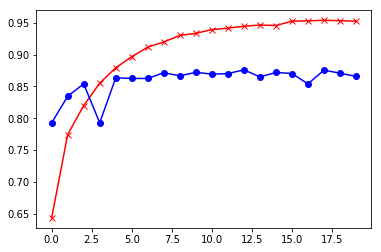

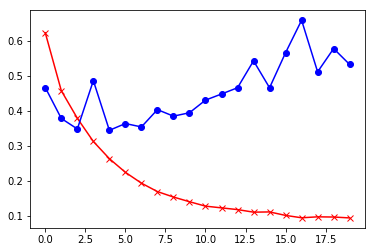

In [0]:
import matplotlib.pyplot as plt
import keras.backend as K

#print('\ntime elapsed = ',str(timedelta(seconds=elapsed)))

print('\nLearning rate = ',K.eval(classifier.optimizer.lr))
print(history.history.keys())

plt.figure(1)
plt.plot(history.history['acc'],'r-x')
plt.plot(history.history['val_acc'],'b-o')

plt.figure(2)
plt.plot(history.history['loss'],'r-x')
plt.plot(history.history['val_loss'],'b-o')

#plt.show()

In [0]:
import numpy
import sklearn.metrics as metrics

predictions = classifier.predict_generator(test_set,steps=15)

predicted_classes = numpy.argmax(predictions, axis=1)

true_classes = test_set.classes
class_labels = list(test_set.class_indices.keys())

print('\ntrue_classes = ',np.shape(true_classes))
print('\nclass_labels = ',class_labels)

print(numpy.shape(predicted_classes))

print(numpy.shape(predictions))

print(test_set)

#report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
#print(report) 


true_classes =  (9515,)

class_labels =  ['DME', 'NORMAL']
(480,)
(480, 1)
